In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
itermethod = "JACOBI"
itermethod = "GAUSSSEIDEL"
itermethod = "SOR"
dim = 1;

../output/SOR_1D.bin
../output/SOR_1D_dim_type.txt
../output/SOR_1D_delta.bin


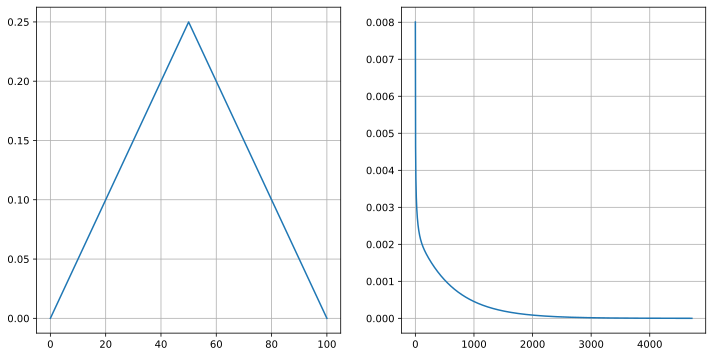

In [3]:

filename = "../output/{0}_{1}D.bin".format(itermethod, dim)
print(filename)
fileinfo = "../output/{0}_{1}D_dim_type.txt".format(itermethod, dim)
print(fileinfo)
filedelta = "../output/{0}_{1}D_delta.bin".format(itermethod, dim)
print(filedelta)

with open(fileinfo, "r") as info:
    lines = info.readlines()
    for row in lines:
        line_data = row.strip("\n")
        line_data = line_data.split(" ")
        Mdim = int(line_data[1])
        Ndim = int(line_data[2])
        Kdim = int(line_data[3])
        sizeof = int(line_data[5])

if sizeof == 4:
    type_t = np.float32
else:
    type_t = np.float64

data = np.zeros([Mdim, Ndim, Kdim], dtype=type_t)
with open(filename, "rb") as f:
    data = np.fromfile(f, dtype=type_t, count=-1).reshape([Mdim, Ndim, Kdim])

with open(filedelta, "rb") as fndelta:
    delta = np.fromfile(fndelta, dtype=np.float64, count=-1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

if dim == 1:
    ax1.plot(data[-1, -1, :])
    ax1.grid()

    ax2.plot(delta)
    ax2.grid()
elif dim == 2:
    im = ax1.imshow(data[-1, :, :], cmap=plt.cm.jet)
    cbar = ax1.figure.colorbar(im, ax=ax1)

    ax2.plot(delta)
    ax2.grid()
elif dim == 3:
    im = ax1.imshow(data[Mdim//2, :, :], cmap=plt.cm.jet)
    cbar = ax1.figure.colorbar(im, ax=ax1)

    ax2.plot(delta)
    ax2.grid()
